In [ ]:
# This notebook is to make Figure S4 of Rodgers et al. 2021 (https://doi.org/10.5194/esd-2021-50). 
# If you have have any questions, please contact the author of this notebook.
# Author: Ryohei Yamaguchi (ryamaguchi  at  pusan.ac.kr)

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ptick

import glob
import os

import cmaps

from tqdm.notebook import tqdm_notebook

def sel_mon(month,smon,emon) :
    return (month>=smon) & (month<=emon)

## READ

In [2]:
idir = '/mnt/lustre/share/CESM/cesm_input/atm/cam/chem/emis'

idir_new_ssp = '/emissions_ssp370-BB_smoothed'
idir_old_hst = '/CMIP6_emissions_1750_2015'
idir_old_ssp = '/emissions_ssp370'
idir_old_ssp2 = '/emissions_ssp'

In [3]:
new_hst_bkc_ant = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_bc_a4_anthro_surface_1750-2015_0.9x1.25_c20170608.nc',decode_cf=True,decode_times=True)
new_hst_bkc_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_bc_a4_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc',decode_cf=True,decode_times=True)
new_hst_DMS_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_DMS_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc',decode_cf=True,decode_times=True)
new_hst_DMS_oth = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_DMS_other_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
new_hst_pom_ant = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_pom_a4_anthro_surface_1750-2015_0.9x1.25_c20170608.nc',decode_cf=True,decode_times=True)
new_hst_pom_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_pom_a4_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc',decode_cf=True,decode_times=True)
new_hst_SO2_an1 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SO2_anthro-ag-ship-res_surface_mol_175001-210101_0.9x1.25_c20200924.nc',decode_cf=True,decode_times=True)
new_hst_SO2_an2 = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SO2_anthro-ene_surface_1750-2015_0.9x1.25_c20170616.nc',decode_cf=True,decode_times=True)
new_hst_SO2_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_SO2_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc',decode_cf=True,decode_times=True)
new_hst_SO4_an1 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_so4_a1_anthro-ag-ship_surface_mol_175001-210101_0.9x1.25_c20200924.nc',decode_cf=True,decode_times=True)
new_hst_SO4_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_so4_a1_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc',decode_cf=True,decode_times=True)
new_hst_SO4_an2 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_so4_a2_anthro-res_surface_mol_175001-210101_0.9x1.25_c20200924.nc',decode_cf=True,decode_times=True)
new_hst_SAG_ant = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SOAGx1.5_anthro_surface_1750-2015_0.9x1.25_c20170608.nc',decode_cf=True,decode_times=True)
new_hst_SAG_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_SOAGx1.5_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc',decode_cf=True,decode_times=True)
new_hst_SAG_bio = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SOAGx1.5_biogenic_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)

In [4]:
old_hst_bkc_ant = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_bc_a4_anthro_surface_1750-2015_0.9x1.25_c20170608.nc',decode_cf=True,decode_times=True)
old_hst_bkc_bmb = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_bc_a4_bb_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
old_hst_DMS_bmb = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_DMS_bb_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
old_hst_DMS_oth = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_DMS_other_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
old_hst_pom_ant = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_pom_a4_anthro_surface_1750-2015_0.9x1.25_c20170608.nc',decode_cf=True,decode_times=True)
old_hst_pom_bmb = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_pom_a4_bb_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
old_hst_SO2_an1 = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SO2_anthro-ag-ship-res_surface_1750-2015_0.9x1.25_c20170616.nc',decode_cf=True,decode_times=True)
old_hst_SO2_an2 = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SO2_anthro-ene_surface_1750-2015_0.9x1.25_c20170616.nc',decode_cf=True,decode_times=True)
old_hst_SO2_bmb = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SO2_bb_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
old_hst_SO4_an1 = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_so4_a1_anthro-ag-ship_surface_1750-2015_0.9x1.25_c20170616.nc',decode_cf=True,decode_times=True)
old_hst_SO4_bmb = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_so4_a1_bb_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
old_hst_SO4_an2 = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_so4_a2_anthro-res_surface_1750-2015_0.9x1.25_c20170616.nc',decode_cf=True,decode_times=True)
old_hst_SAG_ant = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SOAGx1.5_anthro_surface_1750-2015_0.9x1.25_c20170608.nc',decode_cf=True,decode_times=True)
old_hst_SAG_bmb = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SOAGx1.5_bb_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)
old_hst_SAG_bio = xr.open_dataset(idir+idir_old_hst+'/emissions-cmip6_SOAGx1.5_biogenic_surface_1750-2015_0.9x1.25_c20170322.nc',decode_cf=True,decode_times=True)

In [5]:
new_ssp_bkc_ant = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_bc_a4_anthro_surface_mol_175001-210101_0.9x1.25_c20190222.nc' ,decode_cf=True,decode_times=True)
new_ssp_bkc_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_bc_a4_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc' ,decode_cf=True,decode_times=True)
new_ssp_DMS_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_DMS_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc' ,decode_cf=True,decode_times=True)
new_ssp_DMS_oth = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-SSP_DMS_other_surface_mol_175001-210101_0.9x1.25_c20190222.nc' ,decode_cf=True,decode_times=True)
new_ssp_pom_ant = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_pom_a4_anthro_surface_mol_175001-210101_0.9x1.25_c20190222.nc' ,decode_cf=True,decode_times=True)
new_ssp_pom_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_pom_a4_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc' ,decode_cf=True,decode_times=True)
new_ssp_SO2_an1 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SO2_anthro-ag-ship-res_surface_mol_175001-210101_0.9x1.25_c20200924.nc' ,decode_cf=True,decode_times=True)
new_ssp_SO2_an2 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SO2_anthro-ene_surface_mol_175001-210101_0.9x1.25_c20190222.nc' ,decode_cf=True,decode_times=True)
new_ssp_SO2_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_SO2_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc' ,decode_cf=True,decode_times=True)
new_ssp_SO4_an1 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_so4_a1_anthro-ag-ship_surface_mol_175001-210101_0.9x1.25_c20200924.nc' ,decode_cf=True,decode_times=True)
new_ssp_SO4_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_so4_a1_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc' ,decode_cf=True,decode_times=True)
new_ssp_SO4_an2 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_so4_a2_anthro-res_surface_mol_175001-210101_0.9x1.25_c20200924.nc' ,decode_cf=True,decode_times=True)
new_ssp_SAG_ant = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SOAGx1.5_anthro_surface_mol_175001-210101_0.9x1.25_c20200403.nc' ,decode_cf=True,decode_times=True)
new_ssp_SAG_bmb = xr.open_dataset(idir+idir_new_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_smoothed_SOAGx1.5_bb_surface_mol_175001-210101_0.9x1.25_c20201016.nc' ,decode_cf=True,decode_times=True)
new_ssp_SAG_bio = xr.open_dataset(idir+idir_old_ssp2+'/emissions-cmip6-SOAGx1.5_biogenic_surface_mol_175001-210101_0.9x1.25_c20190329.nc' ,decode_cf=True,decode_times=True)

In [6]:
old_ssp_bkc_ant = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_bc_a4_anthro_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_bkc_bmb = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_bc_a4_bb_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_DMS_bmb = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_DMS_bb_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_DMS_oth = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-SSP_DMS_other_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_pom_ant = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_pom_a4_anthro_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_pom_bmb = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_pom_a4_bb_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_SO2_an1 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SO2_anthro-ag-ship-res_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_SO2_an2 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SO2_anthro-ene_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_SO2_bmb = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SO2_bb_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_SO4_an1 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_so4_a1_anthro-ag-ship_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_SO4_bmb = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_so4_a1_bb_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_SO4_an2 = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_so4_a2_anthro-res_surface_mol_175001-210101_0.9x1.25_c20190222.nc',decode_cf=True,decode_times=True)
old_ssp_SAG_ant = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SOAGx1.5_anthro_surface_mol_175001-210101_0.9x1.25_c20200403.nc',decode_cf=True,decode_times=True)
old_ssp_SAG_bmb = xr.open_dataset(idir+idir_old_ssp+'/emissions-cmip6-ScenarioMIP_IAMC-AIM-ssp370-1-1_SOAGx1.5_bb_surface_mol_175001-210101_0.9x1.25_c20200403.nc',decode_cf=True,decode_times=True)
old_ssp_SAG_bio = xr.open_dataset(idir+idir_old_ssp2+'/emissions-cmip6-SOAGx1.5_biogenic_surface_mol_175001-210101_0.9x1.25_c20190329.nc',decode_cf=True,decode_times=True)

In [7]:
def interp_month(da,name,syr,eyr,lon,lat):
    ts_int = np.zeros([(eyr-syr+1)*12,len(lat),len(lon)])
    for imon in range(12):
        ts_mon=da.sel(time=slice(str(syr-1),str(eyr+1))).sel(time=sel_mon(da['time.month'].sel(time=slice(str(syr-1),str(eyr+1))),imon+1,imon+1))
        ts_mon_int=ts_mon.interp(time=["%s-%s-15"%(yr,str(imon+1).zfill(2)) for yr in range(syr,eyr+1)])
        ts_int[imon::12,:,:]=ts_mon_int.values
        
        if eyr==2100 : ts_int[imon::12,:,:][-1,:,:]=da.sel(time=str(eyr)).sel(time=sel_mon(da['time.month'].sel(time=str(eyr)),imon+1,imon+1)).values
            
    xts_int=xr.DataArray(ts_int,dims=['time','lat','lon'],coords=[xr.cftime_range(start=str(syr),end=str(eyr+1),freq='1M'),lat,lon])
    xts_int.name=name
    return xts_int

In [8]:
names=['bkc_ant','bkc_bmb','DMS_bmb','DMS_oth','pom_ant','pom_bmb','SO2_an1','SO2_an2','SO2_bmb','SO4_an1','SO4_bmb','SO4_an2','SAG_ant','SAG_bmb','SAG_bio']
lon=new_ssp_bkc_ant.lon
lat=new_ssp_bkc_ant.lat

new_ssp=[new_ssp_bkc_ant,new_ssp_bkc_bmb,new_ssp_DMS_bmb,new_ssp_DMS_oth,new_ssp_pom_ant,new_ssp_pom_bmb,new_ssp_SO2_an1,new_ssp_SO2_an2,new_ssp_SO2_bmb,new_ssp_SO4_an1,
         new_ssp_SO4_bmb,new_ssp_SO4_an2,new_ssp_SAG_ant,new_ssp_SAG_bmb,new_ssp_SAG_bio]
old_ssp=[old_ssp_bkc_ant,old_ssp_bkc_bmb,old_ssp_DMS_bmb,old_ssp_DMS_oth,old_ssp_pom_ant,old_ssp_pom_bmb,old_ssp_SO2_an1,old_ssp_SO2_an2,old_ssp_SO2_bmb,old_ssp_SO4_an1,
         old_ssp_SO4_bmb,old_ssp_SO4_an2,old_ssp_SAG_ant,old_ssp_SAG_bmb,old_ssp_SAG_bio]
syr,eyr=2015,2100

for i,ds in enumerate(tqdm_notebook(new_ssp)):
    list_var = list(ds.drop('date').keys())
    
    if len(list_var)==1:
        xts_int=interp_month(ds[list_var[0]],names[i],syr,eyr,lon,lat)        
    else:
        for j in list_var:
            if j==list_var[0]: da_sum=ds[j]
            if j!=list_var[0]: da_sum=da_sum+ds[j]
        xts_int=interp_month(da_sum,names[i],syr,eyr,lon,lat)        
        
    if i==0 : xnew_ssp=xts_int
    if i!=0 : xnew_ssp=xr.merge([xnew_ssp,xts_int])

for i,ds in enumerate(tqdm_notebook(old_ssp)):
    list_var = list(ds.drop('date').keys())
    
    if len(list_var)==1:
        xts_int=interp_month(ds[list_var[0]],names[i],syr,eyr,lon,lat)        
    else:
        for j in list_var:
            if j==list_var[0]: da_sum=ds[j]
            if j!=list_var[0]: da_sum=da_sum+ds[j]
        xts_int=interp_month(da_sum,names[i],syr,eyr,lon,lat)        
        
    if i==0 : xold_ssp=xts_int
    if i!=0 : xold_ssp=xr.merge([xold_ssp,xts_int])

        
        
new_hst=[new_hst_bkc_ant,new_hst_bkc_bmb,new_hst_DMS_bmb,new_hst_DMS_oth,new_hst_pom_ant,new_hst_pom_bmb,new_hst_SO2_an1,new_hst_SO2_an2,new_hst_SO2_bmb,new_hst_SO4_an1,
         new_hst_SO4_bmb,new_hst_SO4_an2,new_hst_SAG_ant,new_hst_SAG_bmb,new_hst_SAG_bio]
old_hst=[old_hst_bkc_ant,old_hst_bkc_bmb,old_hst_DMS_bmb,old_hst_DMS_oth,old_hst_pom_ant,old_hst_pom_bmb,old_hst_SO2_an1,old_hst_SO2_an2,old_hst_SO2_bmb,old_hst_SO4_an1,
         old_hst_SO4_bmb,old_hst_SO4_an2,old_hst_SAG_ant,old_hst_SAG_bmb,old_hst_SAG_bio]        
syr,eyr=1850,2014

for i,ds in enumerate(tqdm_notebook(new_hst)):
    list_var = list(ds.drop('date').keys())
    
    if len(list_var)==1:
        xts_int=interp_month(ds[list_var[0]],names[i],syr,eyr,lon,lat)        
#        xts_int=extract(ds[list_var[0]],names[i],syr,eyr,lon,lat)        
    else:
        for j in list_var:
            if j==list_var[0]: da_sum=ds[j]
            if j!=list_var[0]: da_sum=da_sum+ds[j]
        xts_int=interp_month(da_sum,names[i],syr,eyr,lon,lat)        
#        xts_int=extract(da_sum,names[i],syr,eyr,lon,lat)        
        
    if i==0 : xnew_hst=xts_int
    if i!=0 : xnew_hst=xr.merge([xnew_hst,xts_int])

for i,ds in enumerate(tqdm_notebook(old_hst)):
    list_var = list(ds.drop('date').keys())
    
    if len(list_var)==1:
        xts_int=interp_month(ds[list_var[0]],names[i],syr,eyr,lon,lat)        
#        xts_int=extract(ds[list_var[0]],names[i],syr,eyr,lon,lat)        
    else:
        for j in list_var:
            if j==list_var[0]: da_sum=ds[j]
            if j!=list_var[0]: da_sum=da_sum+ds[j]
        xts_int=interp_month(da_sum,names[i],syr,eyr,lon,lat)        
#        xts_int=extract(da_sum,names[i],syr,eyr,lon,lat)        
        
    if i==0 : xold_hst=xts_int
    if i!=0 : xold_hst=xr.merge([xold_hst,xts_int])

In [9]:
bkc=xr.concat([xnew_hst.bkc_bmb,xnew_ssp.bkc_bmb],dim='time')
bkc.name='bkc'
dms=xr.concat([xnew_hst.DMS_bmb,xnew_ssp.DMS_bmb],dim='time')
dms.name='dms'
pom=xr.concat([xnew_hst.pom_bmb,xnew_ssp.pom_bmb],dim='time')
pom.name='pom'
so2=xr.concat([xnew_hst.SO2_bmb,xnew_ssp.SO2_bmb],dim='time')
so2.name='so2'
so4=xr.concat([xnew_hst.SO4_bmb,xnew_ssp.SO4_bmb],dim='time')
so4.name='so4'
sag=xr.concat([xnew_hst.SAG_bmb,xnew_ssp.SAG_bmb],dim='time')
sag.name='sag'
bmb_new=xr.merge([bkc,dms,pom,so2,so4,sag])

bkc=xr.concat([xold_hst.bkc_bmb,xold_ssp.bkc_bmb],dim='time')
bkc.name='bkc'
dms=xr.concat([xold_hst.DMS_bmb,xold_ssp.DMS_bmb],dim='time')
dms.name='dms'
pom=xr.concat([xold_hst.pom_bmb,xold_ssp.pom_bmb],dim='time')
pom.name='pom'
so2=xr.concat([xold_hst.SO2_bmb,xold_ssp.SO2_bmb],dim='time')
so2.name='so2'
so4=xr.concat([xold_hst.SO4_bmb,xold_ssp.SO4_bmb],dim='time')
so4.name='so4'
sag=xr.concat([xold_hst.SAG_bmb,xold_ssp.SAG_bmb],dim='time')
sag.name='sag'
bmb_old=xr.merge([bkc,dms,pom,so2,so4,sag])

In [10]:
bkc=xr.concat([xnew_hst.bkc_ant,xnew_ssp.bkc_ant],dim='time')
bkc.name='bkc'
dms=xr.concat([xnew_hst.DMS_oth,xnew_ssp.DMS_oth],dim='time')
dms.name='dms'
pom=xr.concat([xnew_hst.pom_ant,xnew_ssp.pom_ant],dim='time')
pom.name='pom'
so2=xr.concat([xnew_hst.SO2_an1,xnew_ssp.SO2_an1],dim='time')+xr.concat([xnew_hst.SO2_an2,xnew_ssp.SO2_an2],dim='time')
so2.name='so2'
so4=xr.concat([xnew_hst.SO4_an1,xnew_ssp.SO4_an1],dim='time')+xr.concat([xnew_hst.SO4_an2,xnew_ssp.SO4_an2],dim='time')
so4.name='so4'
sag=xr.concat([xnew_hst.SAG_ant,xnew_ssp.SAG_ant],dim='time')
sag.name='sag'
ant_new=xr.merge([bkc,dms,pom,so2,so4,sag])

bkc=xr.concat([xold_hst.bkc_ant,xold_ssp.bkc_ant],dim='time')
bkc.name='bkc'
dms=xr.concat([xold_hst.DMS_oth,xold_ssp.DMS_oth],dim='time')
dms.name='dms'
pom=xr.concat([xold_hst.pom_ant,xold_ssp.pom_ant],dim='time')
pom.name='pom'
so2=xr.concat([xold_hst.SO2_an1,xold_ssp.SO2_an1],dim='time')+xr.concat([xold_hst.SO2_an2,xold_ssp.SO2_an2],dim='time')
so2.name='so2'
so4=xr.concat([xold_hst.SO4_an1,xold_ssp.SO4_an1],dim='time')+xr.concat([xold_hst.SO4_an2,xold_ssp.SO4_an2],dim='time')
so4.name='so4'
sag=xr.concat([xold_hst.SAG_ant,xold_ssp.SAG_ant],dim='time')
sag.name='sag'
ant_old=xr.merge([bkc,dms,pom,so2,so4,sag])

In [11]:
bio_new=xr.concat([xnew_hst.SAG_bio,xnew_ssp.SAG_bio],dim='time').to_dataset(name='sag')
bio_old=xr.concat([xold_hst.SAG_bio,xold_ssp.SAG_bio],dim='time').to_dataset(name='sag')

<xarray.DataArray (lat: 192, lon: 288)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.39576352e+12, 2.39576352e+12, 2.39576352e+12, ...,
        2.39576352e+12, 2.39576352e+12, 2.39576352e+12],
       [4.79090210e+12, 4.79090210e+12, 4.79090210e+12, ...,
        4.79090210e+12, 4.79090210e+12, 4.79090210e+12],
       ...,
       [4.79090210e+12, 4.79090210e+12, 4.79090210e+12, ...,
        4.79090210e+12, 4.79090210e+12, 4.79090210e+12],
       [2.39576352e+12, 2.39576352e+12, 2.39576352e+12, ...,
        2.39576352e+12, 2.39576352e+12, 2.39576352e+12],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

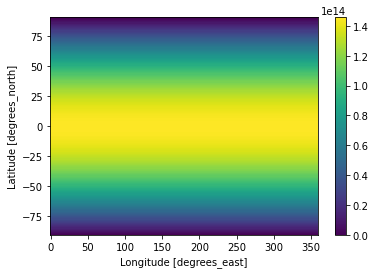

In [12]:
re     = 6.37122e6
ds=bmb_new
lat_bnds=np.zeros([192,2])*np.nan
lat_bnds[:,1]=(ds.lat.values+np.roll(ds.lat.values,-1))/2.
lat_bnds[-1,1]=ds.lat.values[-1]
lat_bnds[:,0]=(ds.lat.values+np.roll(ds.lat.values,1))/2.
lat_bnds[0,0]=ds.lat.values[0]

lon_bnds=np.zeros([288,2])*np.nan
lon_bnds[:,1]=(ds.lon.values+np.roll(ds.lon.values,-1))/2.
lon_bnds[-1,1]=(ds.lon.values[-1]+ds.lon.values[0]+360.)/2.
lon_bnds[:,0]=(ds.lon.values+np.roll(ds.lon.values,1))/2.
lon_bnds[0,0]=(ds.lon.values[-1]-360.+ds.lon.values[0])/2.

xlat_bnds=xr.DataArray(lat_bnds,dims=['lat','d'],coords=[ds.lat,[0,1]])
xlon_bnds=xr.DataArray(lon_bnds,dims=['lon','d'],coords=[ds.lon,[0,1]])

dlat=(2*np.pi*re)*np.abs(xlat_bnds[:,1]-xlat_bnds[:,0])/360.
dlon=(2*np.pi*re*xr.ufuncs.cos(np.deg2rad(ds.lat)))*np.abs(xlon_bnds[:,1]-xlon_bnds[:,0])/360.
dlon=xr.where(dlon<0,0,dlon)
area=dlat*dlon*1e4 #m2 ->cm2
area.plot()
area

## PLOT

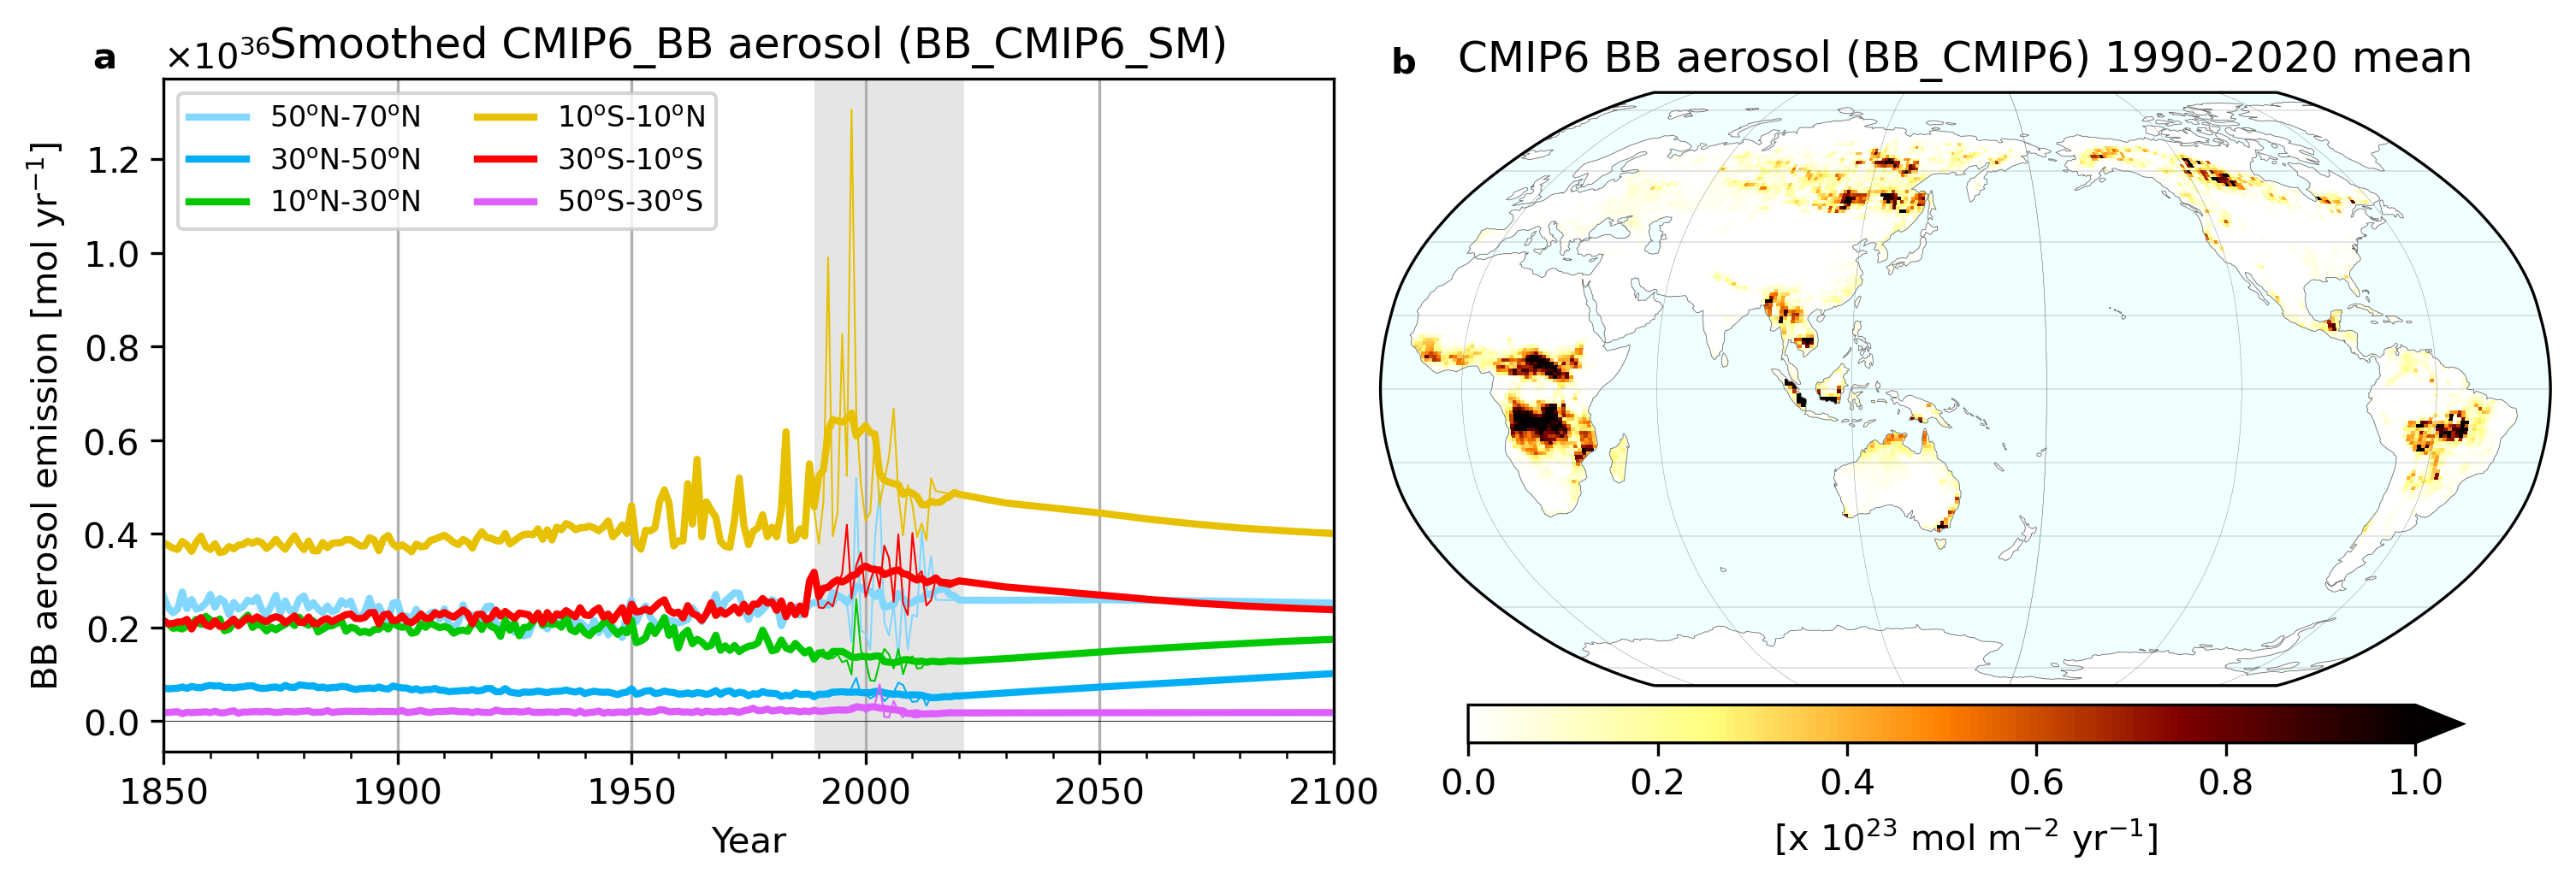

In [13]:
import matplotlib.gridspec as gridspec 

fig  = plt.figure(figsize=(12,5),dpi=300,facecolor='white')
spec = gridspec.GridSpec(ncols=2, nrows=10,wspace=0.04,figure=fig)
ax=[]
ax.append(fig.add_subplot(spec[2:9, 0]))
ax.append(fig.add_subplot(spec[ : , 1],projection=ccrs.Robinson(central_longitude=155)))

#-------------------------------------------------------------------------------------------------------------------------------------------------------

color = cmaps.NMCRef
UC,unit=60.*60.*24.*365.,'[mol yr$^{-1}$]'   #mol s-1 -> mol yr-1
#UC,unit=1,'[mol s$^{-1}$]'   

syr,eyr = 1850,2100

am_new=((bmb_new.bkc+bmb_new.dms+bmb_new.pom+bmb_new.so2+bmb_new.so4+bmb_new.sag).groupby('time.year').mean()*area)
am_old=((bmb_old.bkc+bmb_old.dms+bmb_old.pom+bmb_old.so2+bmb_old.so4+bmb_old.sag).groupby('time.year').mean()*area)

for i,tlat in enumerate(np.flip(np.arange(-40,61,20))):
    if tlat>0 :slat,elat='%s$^{\mathrm{o}}$N'%(tlat-10),'%s$^{\mathrm{o}}$N'%(tlat+10) 
    if tlat<0 :slat,elat='%s$^{\mathrm{o}}$S'%abs(tlat-10),'%s$^{\mathrm{o}}$S'%abs(tlat+10) 
    if tlat==0 :slat,elat='%s$^{\mathrm{o}}$S'%abs(tlat-10),'%s$^{\mathrm{o}}$N'%abs(tlat+10) 
    (UC*am_old).sel(lat=slice(tlat-10,tlat+10)).sum(('lon','lat')).plot(ax=ax[0],linewidth=.5,color=color(i/len(np.arange(-40,61,20))))
    (UC*am_new).sel(lat=slice(tlat-10,tlat+10)).sum(('lon','lat')).plot(ax=ax[0],linewidth= 2,color=color(i/len(np.arange(-40,61,20))),label='%s-%s'%(slat,elat))

ax[0].set_title('Smoothed CMIP6_BB aerosol (BB_CMIP6_SM)')
#ax[0].set_title('')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('BB aerosol emission %s' %unit)
ax[0].grid(axis='x')
ax[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax[0].ticklabel_format(style='sci',axis='y',scilimits=(0,0))
ax[0].set_xticks(np.arange(syr,eyr+1,50))
ax[0].set_xticks(np.arange(syr,eyr+1,10),minor=True)

ax[0].set_xlim(syr,eyr)
ax[0].axvspan(1989,2021,color='gray',alpha=0.2,lw=0)
ax[0].hlines([0],syr,eyr,color='black',lw=0.2)
ax[0].legend(fontsize=8,ncol=2)

#-------------------------------------------------------------------------------------------------------------------------------------------------------
syr,eyr = 1990,2020
UC,unit=(1e-23)*(1e4)*60.*60.*24.*365.,'[x 10$^{23}$ mol m$^{-2}$ yr$^{-1}$]'   #mol cm-2 s-2 -> mol m-2 yr-2

total_old=((bmb_old.bkc+bmb_old.dms+bmb_old.pom+bmb_old.so2+bmb_old.so4+bmb_old.sag)).sel(time=slice(str(syr),str(eyr))).groupby('time.year').mean()
total_new=((bmb_new.bkc+bmb_new.dms+bmb_new.pom+bmb_new.so2+bmb_new.so4+bmb_new.sag)).sel(time=slice(str(syr),str(eyr))).groupby('time.year').mean()

cbar_kwarg={'orientation':'horizontal','pad':0.02,'shrink':0.85,'aspect':25,'label':unit}
#(UC*(total_new.std('year')-total_old.std('year'))).plot.pcolormesh(ax=ax[1],transform=ccrs.PlateCarree(),cbar_kwargs=cbar_kwarg,cmap=cmaps.MPL_Blues_r,vmin=-5,vmax=0)
(UC*total_old.mean('year')).plot.pcolormesh(ax=ax[1],transform=ccrs.PlateCarree(),cbar_kwargs=cbar_kwarg,cmap=cmaps.MPL_afmhot_r,vmin=0,vmax=1)
ax[1].set_title('CMIP6 BB aerosol (BB_CMIP6) %s-%s mean' %(syr,eyr))
#ax[1].set_title('')

ax[1].set_global()
ax[1].add_feature(cf.NaturalEarthFeature('physical', 'ocean', '110m', facecolor='azure'))
ax[1].coastlines(color='dimgray',linewidth=0.2)
gl = ax[1].gridlines(draw_labels=False,crs=ccrs.PlateCarree(),color='gray',linewidth=0.1)
gl.xlocator = mticker.FixedLocator(np.linspace(-180,180,7))
gl.ylocator = mticker.FixedLocator(np.linspace(-80,80,9))


ax[0].text(-0.05, 1.03,'a', fontsize = 10, ha='center', va='center', fontweight='bold', transform=ax[0].transAxes)
ax[1].text( 0.02, 1.05,'b', fontsize = 10, ha='center', va='center', fontweight='bold', transform=ax[1].transAxes)
    
fig.canvas.draw()
#plt.tight_layout()
plt.show()

from datetime import datetime
today = datetime.today()

fig.savefig('/home/ryamaguchi/pp_fig_e2_'+today.strftime("%y%m%d")+'.pdf')